## Instructor Demo: Simulation of Stock Price Trajectory

This program executes a single simulation of stock price trajectory over the next `252` trading days (or year of trading) for `AAPL` stock, based on a normal probability distribution of historical average daily returns derived from the sample mean and standard deviation.

In [1]:
# Import libraries and dependencies
import os
import numpy as np
import pandas as pd
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
from dotenv import load_dotenv
load_dotenv()

# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

### Get 5 Year's Worth of Data via API Call and Read in as DataFrame 

In [3]:
# Set the ticker
ticker = "AAPL"

# Set timeframe to '1D'
timeframe = "1D"

# Set start and end datetimes of 5 years from Today
start_date = pd.Timestamp("2015-05-04", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2020-05-04", tz="America/New_York").isoformat()

# Get 1 year's worth of historical data for AAPL
ticker_data = api.get_barset(
    ticker,
    timeframe,
    start=start_date,
    end=end_date,
    limit = 1000
).df

ticker_data.head()

AAPL                               
                            open   high    low  close    volume
time                                                           
2016-05-13 00:00:00-04:00  90.01  91.67  90.00  90.52  38788350
2016-05-16 00:00:00-04:00  92.45  94.39  91.65  93.87  51078865
2016-05-17 00:00:00-04:00  94.55  94.70  93.01  93.48  39312545
2016-05-18 00:00:00-04:00  94.16  95.21  93.89  94.57  36439836
2016-05-19 00:00:00-04:00  94.63  94.64  93.57  94.20  24660588

### Run the Monte Carlo Simulation

In [4]:
# Set number of simulations
num_sims = 500

# Configure a Monte Carlo simulation to forecast one year daily returns
MC_AAPL = MCSimulation(
    portfolio_data = ticker_data,
    num_simulation = num_sims,
    num_trading_days = 252
)

In [5]:
# Run Monte Carlo simulations to forecast one year daily returns
MC_AAPL.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.012260,0.992288,1.021735,1.007693,1.006008,0.998226,0.998920,0.975305,0.995297,0.985505,...,0.999423,1.026627,1.008970,1.000674,1.020950,1.005662,0.994173,1.012617,1.013447,1.044664
2,0.962733,0.977719,1.042423,1.027357,0.994990,1.002546,0.988063,0.959503,1.035090,0.990300,...,1.016116,1.050878,0.997377,0.997333,1.050576,1.014263,1.011267,1.026545,1.010238,1.065277
3,0.997085,0.990658,1.063082,1.020794,0.974103,0.968227,1.002590,0.948141,1.044178,0.985596,...,0.964702,1.093892,1.023982,1.032425,1.054355,1.015245,1.016835,1.039116,1.005466,1.086506
4,0.999944,0.981007,1.022610,0.993737,0.991754,0.942345,1.006331,0.971607,1.064295,0.968761,...,0.975022,1.147859,1.000356,1.043630,1.069442,1.063320,1.010145,0.996718,0.995184,1.122579
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,1.497167,0.867849,1.017702,0.922246,1.257625,1.550309,1.645207,2.243191,2.379090,1.382802,...,1.957873,1.183345,0.919289,0.896274,1.647439,0.818615,1.068532,2.621066,1.543811,2.169311
249,1.521581,0.881006,1.025493,0.934405,1.243756,1.576470,1.595868,2.254514,2.389598,1.339183,...,1.934036,1.192332,0.910580,0.886262,1.647686,0.805418,1.076851,2.639776,1.559794,2.124843
250,1.563131,0.879095,1.029193,0.916705,1.270128,1.521358,1.549294,2.253802,2.365961,1.324301,...,1.923119,1.205853,0.923905,0.869254,1.672541,0.818667,1.062114,2.701366,1.570093,2.103107
251,1.568831,0.871835,1.021443,0.965635,1.255203,1.542385,1.551625,2.245848,2.390988,1.326461,...,1.900957,1.212553,0.939593,0.851334,1.654302,0.834950,1.063092,2.737705,1.587102,2.150972


### Plot the Simulated Outcomes for the Next Year (252 Traiding Days)

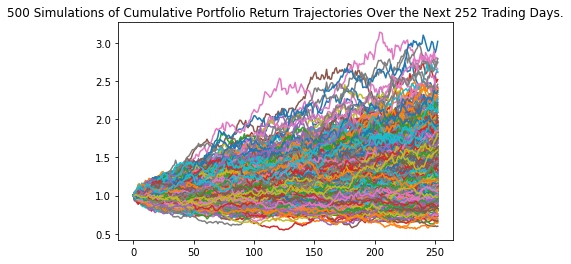

In [7]:
# Plot simulation outcomes
line_plot = MC_AAPL.plot_simulation()

### Plot the Simulated Daily Returns Trajectory for `AAPL` over the Next Year (252 Trading Days)

In [8]:
# Compute summary statistics from the simulated daily returns
simulated_returns_data = {
    'mean' : list(MC_AAPL.simulated_return.mean(axis=1)),
    'median' : list(MC_AAPL.simulated_return.median(axis=1)),
    'min' : list(MC_AAPL.simulated_return.min(axis=1)),
    'max' : list(MC_AAPL.simulated_return.max(axis=1))
}

# Create a DataFrame with the summary statistics
df_simulated_returns = pd.DataFrame(simulated_returns_data)

# Display sample data
df_simulated_returns.head()

,mean,median,min,max
0,1.000000,1.000000,1.000000,1.000000
1,1.002089,1.001957,0.933553,1.052556
2,1.004521,1.003369,0.927386,1.066628
3,1.006020,1.005807,0.906872,1.093892
4,1.006690,1.006214,0.885955,1.147859


<AxesSubplot:title={'center':'Simulated Daily Returns Behavior of AAPL Stock Over the Next Year'}>

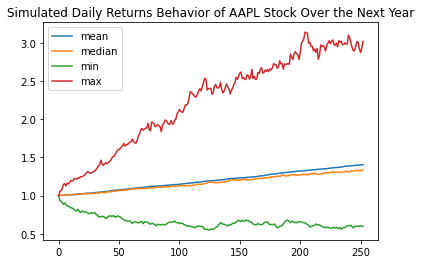

In [9]:
# Use the `plot` function to visually analyze the trajectory of AAPL stock daily returns on a 252 trading day simulation
df_simulated_returns.plot(title="Simulated Daily Returns Behavior of AAPL Stock Over the Next Year")

### Calculate the Simulated Profits/Losses of $10,000 Investment in `AAPL` Over the Next `252` Trading Days

In [10]:
# Set initial investment
initial_investment = 10000

# Multiply an initial investment by the daily returns of simulative stock prices to return the progression of daily returns in terms of money
cumulative_pnl = initial_investment * df_simulated_returns

# Display sample data
cumulative_pnl.head()

,mean,median,min,max
0,10000.000000,10000.000000,10000.000000,10000.000000
1,10020.888491,10019.574996,9335.530320,10525.555340
2,10045.205155,10033.692185,9273.861149,10666.278175
3,10060.196573,10058.068139,9068.719909,10938.922870
4,10066.899439,10062.139679,8859.551397,11478.592573


### Plot the Simulated Profits/Losses of $10,000 Investment in `AAPL` Over the Next `252` Trading Days

<AxesSubplot:title={'center':'Simulated Outcomes Behavior of AAPL Stock Over the Next Year'}>

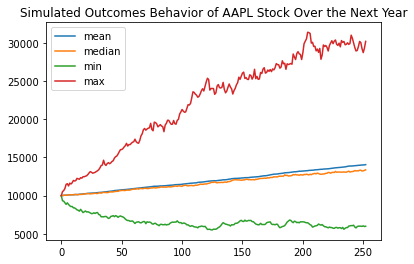

In [11]:
# Use the 'plot' function to create a chart of the simulated profits/losses
cumulative_pnl.plot(title="Simulated Outcomes Behavior of AAPL Stock Over the Next Year")

### Calculate the range of the possible outcomes of our $10,000 investments in `AAPL` stocks

In [12]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_AAPL.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           500.000000
mean              1.406376
std               0.434319
min               0.599437
25%               1.071242
50%               1.338025
75%               1.683586
max               3.020633
95% CI Lower      0.742377
95% CI Upper      2.400711
Name: 252, dtype: float64


In [13]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $10,000 investments in AAPL stocks
ci_lower = round(tbl[8]*10000,2)
ci_upper = round(tbl[9]*10000,2)

# Print results
print(f"There is a 95% chance that an initial investment of $10,000 in the portfolio"
      f" over the next year will end within in the range of"
      f" ${ci_lower} and ${ci_upper}.")

There is a 95% chance that an initial investment of $10,000 in the portfolio over the next year will end within in the range of $7423.77 and $24007.11.
